In [18]:
import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt
import statistics 
from scipy.stats import *
from scipy.spatial import distance

############################################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

print("Repositories uploaded!!")

Repositories uploaded!!


In [19]:
###### reading training and testing files into a numpy array ######

with open('US_data/BigUS/training_V2.npy', 'rb') as f1:
    trainingArr = np.load(f1)
    
    
with open('US_data/BigUS/target_V2.npy', 'rb') as f2:
    targetArr = np.load(f2)

In [20]:
###### train-test split ######

X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(trainingArr, targetArr, test_size = 0.20, random_state = 42)

In [21]:
##### if there are nan values they should be zero #####

X_train_pm25[np.isnan(X_train_pm25)] = 0
X_test_pm25[np.isnan(X_test_pm25)] = 0
y_train_pm25[np.isnan(y_train_pm25)] = 0
y_test_pm25[np.isnan(y_test_pm25)] = 0

In [22]:
X_train_pm25.shape, X_test_pm25.shape, y_train_pm25.shape, y_test_pm25.shape

((64148, 5, 5, 20), (16038, 5, 5, 20), (64148,), (16038,))

In [23]:
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K
import random
import os

fold = 10
epochs = 5000
tr_batch_size = 64148
ev_batch_size = 10000
Input_width = 5
Input_height = 5
num_channels = 20
noise_std = 0.1

n_conv = 64
n_hidden = 128

SEED_NUM = 30000

modelPM25 = Sequential([
Conv2D(n_conv, (3,3), kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.1, seed=SEED_NUM), bias_initializer=initializers.Constant(0.1), input_shape=(Input_width, Input_height, num_channels), padding='same'),
Activation('relu'),
Flatten(),
Dropout(0.5, seed = SEED_NUM),
Dense(n_hidden, activation = 'elu', kernel_initializer = initializers.TruncatedNormal(mean = 0.0, stddev = 0.1, seed = SEED_NUM), bias_initializer=initializers.Constant(0.1)),
Dense(1, activation='linear')
])

nadam = optimizers.Nadam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999, epsilon = None, schedule_decay = 0.004)

modelPM25.compile(optimizer=nadam, loss='mse', metrics=['mae'])

In [ ]:
modelPM25.fit(X_train_pm25, y_train_pm25, epochs = epochs, batch_size = tr_batch_size, verbose = 1)

Epoch 1/5000
1/1 [==============================] - 2s 2s/step - loss: 201.5261 - mae: 11.6233
Epoch 2/5000
1/1 [==============================] - 1s 762ms/step - loss: 5797.7168 - mae: 66.9799
Epoch 3/5000
1/1 [==============================] - 1s 772ms/step - loss: 70.7233 - mae: 6.0418
Epoch 4/5000
1/1 [==============================] - 1s 815ms/step - loss: 49.7086 - mae: 4.8594
Epoch 5/5000
1/1 [==============================] - 1s 787ms/step - loss: 48.1602 - mae: 4.6813
Epoch 6/5000
1/1 [==============================] - 1s 847ms/step - loss: 50.9411 - mae: 4.8157
Epoch 7/5000
1/1 [==============================] - 1s 786ms/step - loss: 53.4880 - mae: 4.9643
Epoch 8/5000
1/1 [==============================] - 1s 785ms/step - loss: 55.0231 - mae: 5.0639
Epoch 9/5000
1/1 [==============================] - 1s 848ms/step - loss: 55.8602 - mae: 5.1245
Epoch 10/5000
1/1 [==============================] - 1s 779ms/step - loss: 56.4900 - mae: 5.1421
Epoch 11/5000
1/1 [==================

In [11]:
pred_pm25 = modelPM25.predict(X_test_pm25, batch_size = 1).reshape(len(X_test_pm25),)

16038/16038 [==============================] - 9s 550us/step


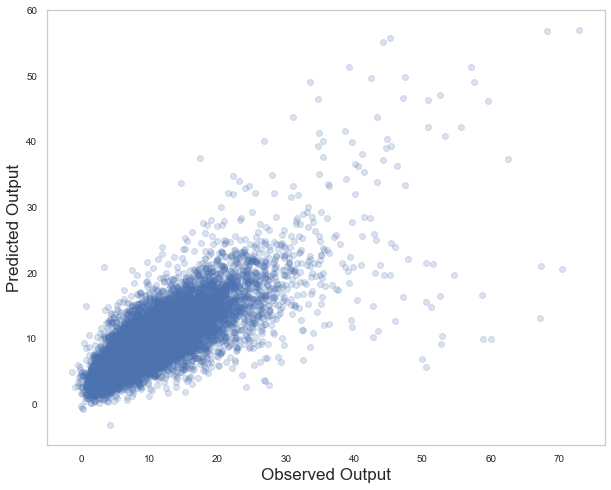

In [17]:
import matplotlib.pyplot as plt
import pylab

plt.figure(figsize=(10,8))
plt.scatter(y_test_pm25,pred_pm25,alpha=0.2) ##(x,y)
plt.xlabel('Observed Output', size= 17)
plt.ylabel('Predicted Output', size= 17)
plt.show()

(0.0, 100.0)

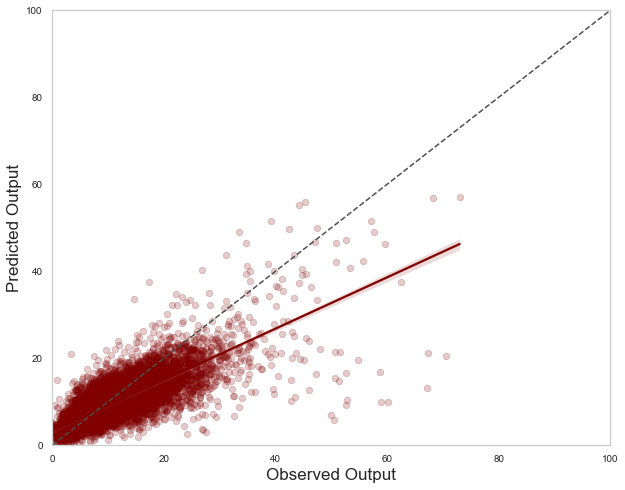

In [16]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 0.9)
sns.set_style("whitegrid", {'axes.grid' : False})

sns.regplot(y_test_pm25, pred_pm25, color = 'maroon',  scatter_kws = {'s':40, 'alpha':0.2})
plt.plot([0, 100], [0, 100], ls="--", c=".3")
plt.xlabel('Observed Output', size= 17)
plt.ylabel('Predicted Output', size= 17)


plt.xlim(0, 100)
plt.ylim(0, 100)


In [12]:
val_r2 = pearsonr(y_test_pm25, pred_pm25)
val_r2 = (val_r2[0])**2

In [13]:
val_r2

0.6429050347041895

In [14]:
val_mse = sqrt(mean_squared_error(y_test_pm25, pred_pm25))

In [15]:
val_mse

3.9287719557317438

In [67]:
df_pm25small = pd.read_csv("TL_data/cnn/national_pm_fit_2011_2.csv")

In [72]:
df_pm25small['lat']

0        33.5
1        33.5
2        33.5
3        33.5
4        32.5
         ... 
80338    30.5
80339    27.5
80340    34.0
80341    46.5
80342    47.0
Name: lat, Length: 80343, dtype: float64

In [11]:
#### import small training dataset
df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)
df_pm25small = df_pm25small.drop(['Unnamed: 0'], axis = 1)

<ipython-input-11-dfd3f0f990a3>:2: DtypeWarning: Columns (91,94,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pm25small = pd.read_csv("US_data/BigUS/pm25small_lut.csv", index_col=None)


In [14]:
######### import big US datasets for 12 months #########

df_BUS_1 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_1.csv")
df_BUS_2 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_2.csv")
df_BUS_3 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_3.csv")
df_BUS_4 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_4.csv")
df_BUS_5 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_5.csv")
df_BUS_6 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_6.csv")
df_BUS_7 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_7.csv")
df_BUS_8 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_8.csv")
df_BUS_9 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_9.csv")
df_BUS_10 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_10.csv")
df_BUS_11 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_11.csv")
df_BUS_12 = pd.read_csv("US_data/BigUS/n_aod_pred_2011_new10_12.csv")

In [15]:
df_BUS = pd.concat([df_BUS_1, df_BUS_2, df_BUS_3, df_BUS_4, df_BUS_5, df_BUS_6, df_BUS_7, df_BUS_8, df_BUS_9, df_BUS_10, df_BUS_11, df_BUS_12], ignore_index = True)

<AxesSubplot:xlabel='pm_x', ylabel='pm_y'>

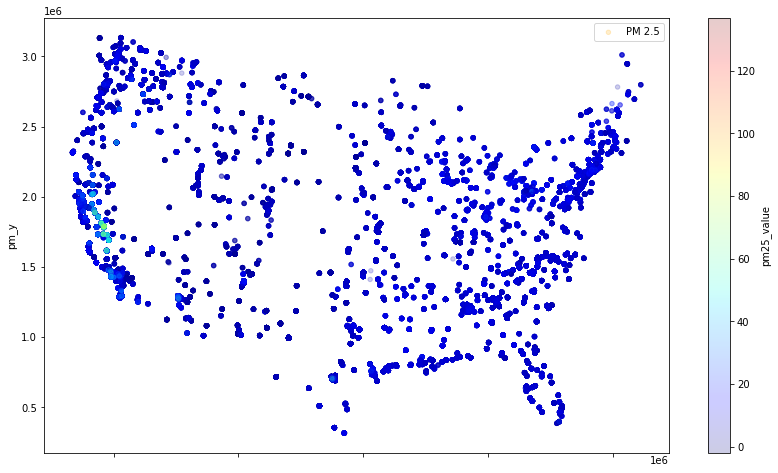

In [99]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd


df_sensors = df_pm25small[['lon', 'lat', 'pm25_value']].copy()
df_sensors = df_sensors.reset_index(drop = True)

us_map = gpd.read_file("ShapeFolder/States_shapefile-shp/States_shapefile.shp")
us_california = us_map[us_map['State_Name'] == 'CALIFORNIA']
us_nevada = us_map[us_map['State_Name'] == 'NEVADA']

df_pm25small.plot(kind="scatter", x="pm_x", y="pm_y", c='pm25_value', label="PM 2.5", cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.2, figsize=(14,8),)


In [49]:
us_california ###this is a multipolygon

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [42]:
us_nevada ###this is a polygon

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
28,29,NV-FP,NV,NEVADA,F,947,"POLYGON ((-119.15245 38.41180, -119.31883 38.5..."


In [40]:
import json

g_california = json.loads(us_california.to_json())
coords_california = np.array(g_california['features'][0]['geometry']['coordinates'])

g_nevada = json.loads(us_nevada.to_json())
coords_nevada = np.array(g_nevada['features'][0]['geometry']['coordinates'])


<ipython-input-40-b94cefb719f8>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  coords_california = np.array(g_california['features'][0]['geometry']['coordinates'])


In [48]:
len(coords_california[0][0]), len(coords_nevada[0])

(246, 84)

In [54]:
cal_nevada_coords = []

for element in coords_california[0][0]:
    cal_nevada_coords.append(element)

for element in coords_nevada[0]:
    cal_nevada_coords.append(element)

In [56]:
len(cal_nevada_coords)

330

In [57]:
cal_nevada_locs = pd.DataFrame(cal_nevada_coords)

In [58]:
cal_nevada_locs

,0,1
0,-121.665220,38.169285
1,-121.782363,38.066776
2,-121.902766,38.072910
3,-121.984549,38.139500
4,-122.232243,38.071080
...,...,...
325,-115.885769,36.001226
326,-117.160424,36.959594
327,-117.838686,37.457298
328,-118.417420,37.886677


In [64]:
cal_nevada_locs = cal_nevada_locs.rename(columns={0: "lat", 1: "lon"})
cal_nevada_locs

,lat,lon
0,-121.665220,38.169285
1,-121.782363,38.066776
2,-121.902766,38.072910
3,-121.984549,38.139500
4,-122.232243,38.071080
...,...,...
325,-115.885769,36.001226
326,-117.160424,36.959594
327,-117.838686,37.457298
328,-118.417420,37.886677


In [101]:
df_pm25_coords = df_pm25small[['pm_x', 'pm_y']]
df_pm25_coords = df_pm25_coords.rename(columns={'pm_x': 'lat', 'pm_y': 'lon'})

In [102]:
df_cal_nevada = df_pm25_coords.merge(cal_nevada_locs, how = 'inner' ,indicator=False)

In [103]:
df_cal_nevada

,lat,lon


In [104]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

polygon = Polygon([tuple(x) for x in df_cal_nevada[['lat', 'lon']].to_numpy()])
df_pm25_coords['Within'] = df_pm25_coords.apply(lambda x: polygon.contains(Point(x['lat'], x['lon'])), axis=1)

In [106]:
df_pm25small['Within']

0        False
1        False
2        False
3        False
4        False
         ...  
80338    False
80339    False
80340    False
80341    False
80342    False
Name: Within, Length: 80343, dtype: bool

In [95]:
bounding_box = us_california.envelope
gpd_cal_nevada = gpd.GeoDataFrame(gpd.GeoSeries(bounding_box), columns=['geometry'])

In [98]:
intersections = gpd.overlay(df_pm25_coords, gpd_cal_nevada, how='intersection')

AttributeError: 'DataFrame' object has no attribute 'crs'